Cannabis is a kind of  plant for medical or recreational use. it  can be used by extact products, smoking, vaporizing, food, and so on.



Our goal is to describe the established data source with at least rough data able to be provided on day one.
In research - by monday 27 april
Write a description for what the data science problem is. What uncertainty or prediction are you trying to discover? How could this data be used to find a solution to this problem?


In [0]:

# Input data files are available in the "../input/" directory.
# running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
      print(os.path.join(dirname, filename))

In [0]:
import pandas as pd
import numpy as np
#df= pd.read_csv("/kaggle/input/cannabis-strains/cannabis.csv")

In [2]:

df = pd.read_csv("cannabis.csv")
print(df.shape)
df.head()

(2351, 6)


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [0]:
df.describe()


,Strain,Type,Rating,Effects,Flavor,Description,rating_best
count,2351,2351,2351,2351,2305,2318,2351
unique,2350,3,1,1655,1293,2312,1
top,B-Witched,hybrid,5,None,None,None,5
freq,2,1212,2351,87,110,4,2351


In [0]:
df['Type'].unique()

array(['hybrid', 'sativa', 'indica'], dtype=object)

In [0]:
df['Type'].value_counts(ascending=False)

hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [0]:
df['Rating'].unique()

array([4. , 4.7, 4.4, 4.2, 4.6, 0. , 4.5, 4.3, 5. , 3.8, 4.1, 4.8, 3.4,
       3.7, 3.9, 3. , 4.9, 3.6, 2.8, 3.3, 3.5, 3.2, 2. , 1. , 3.1, 2.5])

In [0]:
df['Rating'].describe()

count    2351.000000
mean        4.310634
std         0.836394
min         0.000000
25%         4.200000
50%         4.400000
75%         4.700000
max         5.000000
Name: Rating, dtype: float64

In [0]:
df['Rating'].value_counts(ascending=False)

4.5    317
4.3    297
4.4    284
4.6    242
4.2    225
5.0    210
4.7    164
4.8    159
4.0    104
4.1    101
0.0     71
4.9     59
3.9     29
3.8     23
3.7     16
3.0     13
3.6     11
3.5      9
3.4      5
3.2      3
3.3      3
2.0      2
2.8      1
1.0      1
3.1      1
2.5      1
Name: Rating, dtype: int64

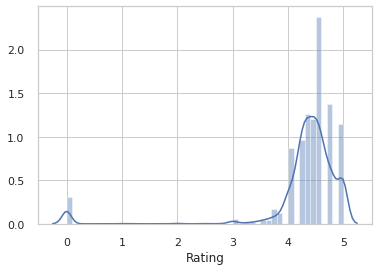

In [0]:
import seaborn as sns
y= df['Rating']
sns.distplot(y);

In [4]:
sns.set(style="whitegrid")
ax = sns.violinplot(x='Type', y='Rating',showmeans=True, showextrema=True, showmedians=True, data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

NameError: ignored

In [0]:
# Get Pandas Profiling Report
!pip install pandas-profiling
import pandas_profiling as pp
pp.ProfileReport(df)


In [0]:
# all columns are objective.
df.select_dtypes(exclude="number").columns.tolist()

['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description', 'rating_best']

In [0]:
df.isnull().sum()

Strain          0
Type            0
Rating         71
Effects         0
Flavor         46
Description    33
dtype: int64

In [0]:
#df = df.dropna(how='all')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

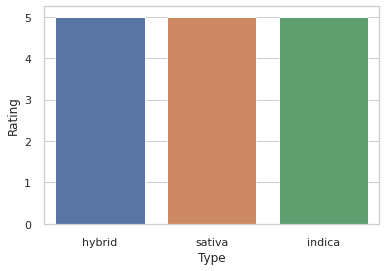

In [0]:
# Comparison barchart, hue="Area Type"
sns.barplot(x="Type", y='Rating',  data=df)
#ax.set_xticklabels(ax.get_xticklabels,rotation=15;
plt.xticks()

In [3]:
df['rating_best']= df['Rating'] >=4
df['rating_best'].sort_values(df['Rating'], ascending=False)

TypeError: ignored

In [0]:
df["Flavor"] = df["Flavor"].fillna("None")


In [0]:
total_flavor = []
max_len = 0
total_flavor.append("None")
for val in df["Flavor"].values:
    print(val)
    val = val.split(",")
    
    if len(val) > max_len:
        max_len = len(val)
    
    for f in val:
        if f not in total_flavor:
            total_flavor.append(f)

In [0]:
len(total_flavor)

50

In [0]:
effects_list = pd.Series(v[0] for v in df['Effects'])
effects_list.unique()

array(['C', 'R', 'U', 'T', 'H', 'N', 'E', 'F', 'S', 'A', 'G', 'D'],
      dtype=object)

In [0]:
len(total_effects)

16

In [0]:
df_tokenized= pd.read_csv("cannabis_tokenized.csv")
print(df_tokenized.shape)
df_tokenized.head()

(2012, 12)


,Unnamed: 0,index,Strain,Type,Rating,Effects,Flavor,Description,Effects_tokens,Flavor_tokens,Description_tokens,General_Description
0,0,1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,"['relaxed', 'aroused', 'creative', 'happy', 'e...","['flowery', 'violet', 'diesel']","['‘98', 'aloha', 'white', 'widow', 'especially...","Relaxed,Aroused,Creative,Happy,EnergeticFlower..."
1,1,2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,"['uplifted', 'happy', 'relaxed', 'energetic', ...","['spicy', 'herbal', 'sage', 'woody']","['1024', 'sativa-dominant', 'hybrid', 'bred', ...","Uplifted,Happy,Relaxed,Energetic,CreativeSpicy..."
2,2,3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"['tingly', 'creative', 'hungry', 'relaxed', 'u...","['apricot', 'citrus', 'grapefruit']","['13', 'dawgs', 'hybrid', 'g13', 'chemdawg', '...","Tingly,Creative,Hungry,Relaxed,UpliftedApricot..."
3,3,4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...","['happy', 'relaxed', 'euphoric', 'uplifted', '...","['citrus', 'earthy', 'orange']","['known', 'kosher', 'tangie,', '24k', 'gold', ...","Happy,Relaxed,Euphoric,Uplifted,TalkativeCitru..."
4,4,6,3-Kings,hybrid,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent","The 3 Kings marijuana strain, a holy trinity o...","['relaxed', 'euphoric', 'happy', 'uplifted', '...","['earthy', 'sweet', 'pungent']","['3', 'kings', 'marijuana', 'strain,', 'holy',...","Relaxed,Euphoric,Happy,Uplifted,HungryEarthy,S..."


In [0]:
with open(‘df.pkl’, ‘rb’) as f:
    dest_object_name = pickle.load(f)

SyntaxError: ignored